In [46]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle
import os
import pandas as pd
import seaborn as sns
cur_path = 'summaries.p'


In [47]:
with open(cur_path, 'rb') as fp:
    data = pickle.load(fp)
for i in data.keys():
	if i=='condition':
		continue

	print(i,len(data[i]))
# del data['condition']
df = pd.DataFrame.from_dict(data, orient='columns')
df

steps_1 1842
steps_2 1842
auc_1 1842
auc_2 1842
auc_forget 1842
index 1842
id 1842
accuracy_1 1842
accuracy_2 1842
accuracy_forget 1842
hidden_size 1842


,steps_1,steps_2,auc_1,auc_2,auc_forget,index,id,accuracy_1,accuracy_2,accuracy_forget,hidden_size
0,12860,11132,0.999988,0.999956,0.614442,0,original,0.99818,0.99725,0.70207,100
1,12261,7923,0.999943,0.999976,0.353573,0,heterogeneous_constant,0.99829,0.99778,0.50157,100
2,11926,9940,0.999967,0.999897,0.599207,0,heterogeneous_dynamic_weights_relu6,0.99752,0.99611,0.69930,100
3,10950,10674,0.999935,0.999882,0.611447,0,original,0.99796,0.99555,0.67092,100
4,9915,11383,0.999963,0.999833,0.337708,0,heterogeneous_constant,0.99732,0.99501,0.49717,100
...,...,...,...,...,...,...,...,...,...,...,...
1837,13550,15572,0.999999,0.999990,0.346942,1,heterogeneous_constant,0.99969,0.99845,0.51215,10
1838,13804,14920,0.999981,0.999923,0.589954,1,heterogeneous_dynamic_weights_relu6,0.99846,0.99565,0.58855,10
1839,15534,3931,0.999991,0.999800,0.519953,2,original,0.99911,0.99467,0.57851,10
1840,13636,4460,0.999955,0.999870,0.441684,2,heterogeneous_constant,0.99835,0.99576,0.51693,10


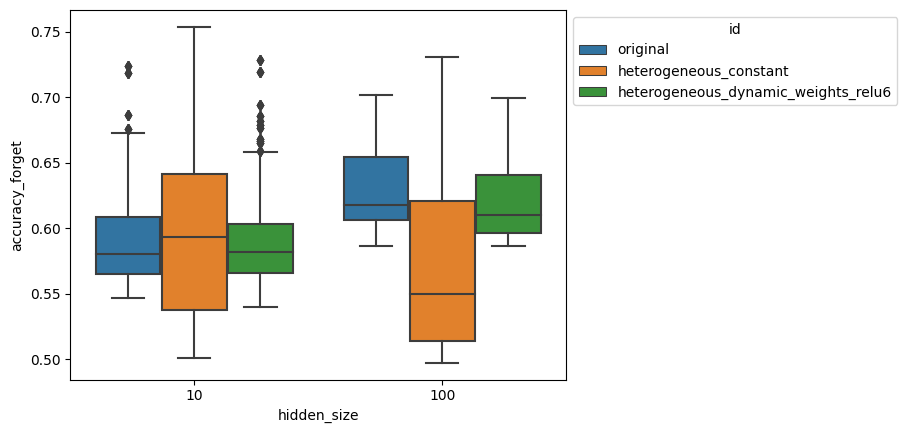

In [48]:
ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='id')
sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))

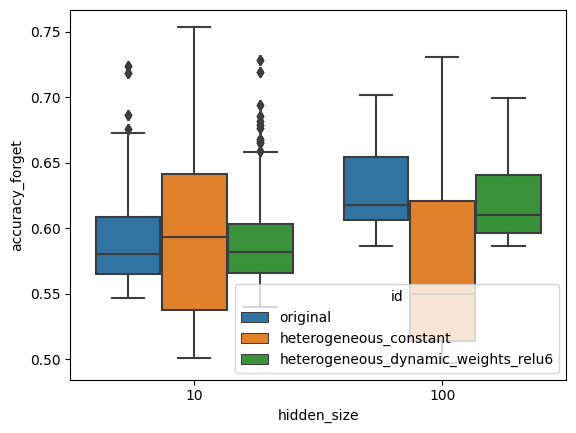

In [49]:
ax = sns.boxplot(df,x='hidden_size',y='accuracy_forget',hue='id')

<AxesSubplot: xlabel='hidden_size', ylabel='auc_forget'>

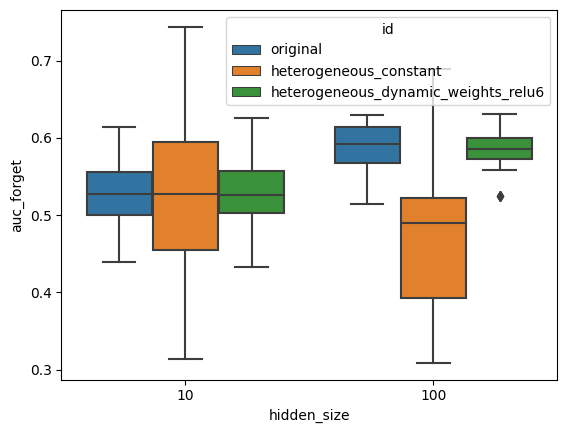

In [50]:
sns.boxplot(df,x='hidden_size',y='auc_forget',hue='id')

<AxesSubplot: xlabel='hidden_size', ylabel='steps_2'>

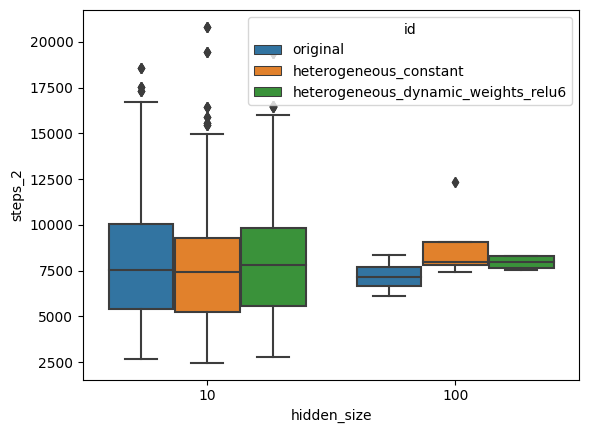

In [44]:
sns.boxplot(df,x='hidden_size',y='steps_2',hue='id')